In [1]:
import torch
import pandas as pd
import pennylane as qml
from pennylane import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from data_utils import mnist_preparation, add_salt_and_pepper_noise 
from evaluationUtils import calculate_mcm_accuracy
from tqdm import tqdm
import matplotlib as plt
from mcmadaptablemodel import MCMQuantumModel, MCMCircuit
from pennylane import Device
from pennylane.measurements import StateMP
from torch.nn import Module, ParameterDict
import matplotlib.pyplot as plt
from OriginalModel import FullQuantumModel, QuantumCircuit
import warnings
from typing import Optional, Dict, List, Any
from torch.utils.data import DataLoader, dataloader
from time import time
import math
from pennylane.measurements import MidMeasureMP
torch.manual_seed(1234)

# Salt and Pepper

In [24]:
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([
                                transforms.Resize((16, 16)),  # Resize to 16x16
                                transforms.ToTensor(),
                             ]))

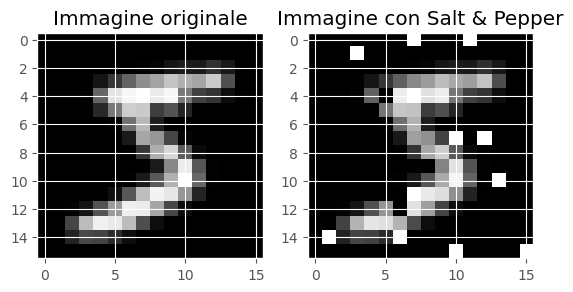

In [25]:
sample_image, _ = mnist[0] 
noisy_image = add_salt_and_pepper_noise(sample_image, salt_prob=0.05, pepper_prob=0.05)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(sample_image.squeeze(), cmap='gray')
ax[0].set_title('Immagine originale')
ax[1].imshow(noisy_image.squeeze(), cmap='gray')
ax[1].set_title('Immagine con Salt & Pepper')
plt.show()

# Original Model performance


In [144]:
labels = [0,1,2,3]
# Download MNIST and prepare transforms
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([
                                transforms.Resize((16, 16)),  # Resize to 16x16
                                transforms.ToTensor(),
                                #transforms.Lambda(lambda img: add_salt_and_pepper_noise(img, salt_prob=0.1, pepper_prob=0.1)),
                                transforms.Normalize((0.1307,), (0.3081,))  # Normalize
                             ]))
#train/vali/test 70/15/15 split, see data_utils.py for further details
train_dataloader, validation_dataloader, test_dataloader = mnist_preparation(dataset=mnist, labels = labels, train_test_ratio=0.7,batch_size=64, vali_test_ratio=0.5)

print("Images in the training set: ", len(train_dataloader.dataset), "\n Images in the validation set: ", len(validation_dataloader.dataset), "\n Images in the test set: ", len(test_dataloader.dataset))

Images in the training set:  17327 
 Images in the validation set:  3713 
 Images in the test set:  3714


In [145]:
mcm_model =  MCMQuantumModel(qubits=8, layers=8, early_exits=[3])

In [146]:
#mcm_model.draw(style='sketch')

Epoch 1/50: 100%|██████████| 270/270 [02:10<00:00,  2.07it/s, fm_accuracy=0.734, loss=2.45, mcm_accuracy=0.859]


Time per epoch (s):  130.1851499080658
Epoch:  1 Loss:  2.6236161523395114
--------------------------------------------------------------------------
Mid circuit accuracy:  0.5918402777777778
--------------------------------------------------------------------------
Final Measurement accuracy:  0.4882523148148148
--------------------------------------------------------------------------


Epoch 2/50: 100%|██████████| 270/270 [02:07<00:00,  2.11it/s, fm_accuracy=0.859, loss=2.4, mcm_accuracy=0.828] 


Time per epoch (s):  127.91495680809021
Epoch:  2 Loss:  2.449253119362725
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8093171296296297
--------------------------------------------------------------------------
Final Measurement accuracy:  0.7364583333333333
--------------------------------------------------------------------------


Epoch 3/50: 100%|██████████| 270/270 [02:13<00:00,  2.03it/s, fm_accuracy=0.781, loss=2.39, mcm_accuracy=0.797]


Time per epoch (s):  133.1226019859314
Epoch:  3 Loss:  2.378757189821314
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8188657407407407
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8373842592592593
--------------------------------------------------------------------------


Epoch 4/50: 100%|██████████| 270/270 [02:10<00:00,  2.06it/s, fm_accuracy=0.859, loss=2.3, mcm_accuracy=0.844] 


Time per epoch (s):  130.8679280281067
Epoch:  4 Loss:  2.3244263278113473
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8302662037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8626157407407408
--------------------------------------------------------------------------


Epoch 5/50: 100%|██████████| 270/270 [02:09<00:00,  2.09it/s, fm_accuracy=0.781, loss=2.38, mcm_accuracy=0.781]


Time per epoch (s):  129.48780703544617
Epoch:  5 Loss:  2.2972228791978626
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8382523148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8689236111111112
--------------------------------------------------------------------------


Epoch 6/50: 100%|██████████| 270/270 [02:12<00:00,  2.03it/s, fm_accuracy=0.859, loss=2.25, mcm_accuracy=0.781]


Time per epoch (s):  132.7451729774475
Epoch:  6 Loss:  2.2622824245029025
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8470486111111111
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8721064814814815
--------------------------------------------------------------------------


Epoch 7/50: 100%|██████████| 270/270 [02:09<00:00,  2.08it/s, fm_accuracy=0.859, loss=2.24, mcm_accuracy=0.828]


Time per epoch (s):  129.8219609260559
Epoch:  7 Loss:  2.2261053456200495
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8435185185185186
--------------------------------------------------------------------------
Final Measurement accuracy:  0.877199074074074
--------------------------------------------------------------------------


Epoch 8/50: 100%|██████████| 270/270 [02:14<00:00,  2.01it/s, fm_accuracy=0.797, loss=2.24, mcm_accuracy=0.797]


Time per epoch (s):  134.32653903961182
Epoch:  8 Loss:  2.2044974706791067
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8421296296296297
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8780671296296296
--------------------------------------------------------------------------


Epoch 9/50: 100%|██████████| 270/270 [02:12<00:00,  2.04it/s, fm_accuracy=0.844, loss=2.22, mcm_accuracy=0.812]


Time per epoch (s):  132.35658502578735
Epoch:  9 Loss:  2.1885323718742087
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8425347222222223
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8673611111111111
--------------------------------------------------------------------------


Epoch 10/50: 100%|██████████| 270/270 [02:15<00:00,  2.00it/s, fm_accuracy=0.828, loss=2.19, mcm_accuracy=0.812]


Time per epoch (s):  135.11868691444397
Epoch:  10 Loss:  2.175506325121279
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8554976851851852
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8708912037037037
--------------------------------------------------------------------------


Epoch 11/50: 100%|██████████| 270/270 [02:11<00:00,  2.05it/s, fm_accuracy=0.875, loss=2.16, mcm_accuracy=0.891]


Time per epoch (s):  131.50245594978333
Epoch:  11 Loss:  2.1568081158178822
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8689814814814815
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8732060185185185
--------------------------------------------------------------------------


Epoch 12/50: 100%|██████████| 270/270 [02:11<00:00,  2.05it/s, fm_accuracy=0.844, loss=2.13, mcm_accuracy=0.875]


Time per epoch (s):  131.9618239402771
Epoch:  12 Loss:  2.1351808141779016
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8697337962962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8702546296296296
--------------------------------------------------------------------------


Epoch 13/50: 100%|██████████| 270/270 [02:14<00:00,  2.01it/s, fm_accuracy=0.875, loss=2.15, mcm_accuracy=0.859]


Time per epoch (s):  134.36782383918762
Epoch:  13 Loss:  2.1227189549693355
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8694444444444445
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8741898148148148
--------------------------------------------------------------------------


Epoch 14/50: 100%|██████████| 270/270 [02:12<00:00,  2.04it/s, fm_accuracy=0.75, loss=2.2, mcm_accuracy=0.703]  


Time per epoch (s):  132.10477995872498
Epoch:  14 Loss:  2.1182156015325475
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8670138888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8710648148148148
--------------------------------------------------------------------------


Epoch 15/50: 100%|██████████| 270/270 [02:13<00:00,  2.02it/s, fm_accuracy=0.875, loss=2.1, mcm_accuracy=0.828] 


Time per epoch (s):  133.86149406433105
Epoch:  15 Loss:  2.116274520202919
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8646990740740741
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8668402777777777
--------------------------------------------------------------------------


Epoch 16/50: 100%|██████████| 270/270 [02:10<00:00,  2.08it/s, fm_accuracy=0.891, loss=2.1, mcm_accuracy=0.922] 


Time per epoch (s):  130.0572452545166
Epoch:  16 Loss:  2.1154162530545837
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8638888888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8641203703703704
--------------------------------------------------------------------------


Epoch 17/50: 100%|██████████| 270/270 [02:12<00:00,  2.04it/s, fm_accuracy=0.797, loss=2.14, mcm_accuracy=0.781]


Time per epoch (s):  132.12227487564087
Epoch:  17 Loss:  2.1147483816853274
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8654513888888888
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8658564814814815
--------------------------------------------------------------------------


Epoch 18/50: 100%|██████████| 270/270 [02:12<00:00,  2.03it/s, fm_accuracy=0.875, loss=2.13, mcm_accuracy=0.844]


Time per epoch (s):  132.80386304855347
Epoch:  18 Loss:  2.1140229136855515
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8643518518518518
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8631944444444445
--------------------------------------------------------------------------


Epoch 19/50: 100%|██████████| 270/270 [02:13<00:00,  2.03it/s, fm_accuracy=0.859, loss=2.12, mcm_accuracy=0.828]


Time per epoch (s):  133.29322600364685
Epoch:  19 Loss:  2.1133355299631753
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8655092592592593
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8663194444444444
--------------------------------------------------------------------------


Epoch 20/50: 100%|██████████| 270/270 [02:12<00:00,  2.04it/s, fm_accuracy=0.844, loss=2.14, mcm_accuracy=0.875]


Time per epoch (s):  132.07684803009033
Epoch:  20 Loss:  2.1125592355374936
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8643518518518518
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8646990740740741
--------------------------------------------------------------------------


Epoch 21/50: 100%|██████████| 270/270 [02:10<00:00,  2.06it/s, fm_accuracy=0.797, loss=2.17, mcm_accuracy=0.828]


Time per epoch (s):  130.9385998249054
Epoch:  21 Loss:  2.1112199271166765
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8631944444444445
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8677083333333333
--------------------------------------------------------------------------


Epoch 22/50: 100%|██████████| 270/270 [02:11<00:00,  2.06it/s, fm_accuracy=0.891, loss=2.05, mcm_accuracy=0.969]


Time per epoch (s):  131.04026818275452
Epoch:  22 Loss:  2.109622597694397
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8642939814814815
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8696180555555556
--------------------------------------------------------------------------


Epoch 23/50: 100%|██████████| 270/270 [02:10<00:00,  2.08it/s, fm_accuracy=0.859, loss=2.12, mcm_accuracy=0.828]


Time per epoch (s):  130.07151293754578
Epoch:  23 Loss:  2.107641232896734
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8646412037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.872800925925926
--------------------------------------------------------------------------


Epoch 24/50: 100%|██████████| 270/270 [02:12<00:00,  2.04it/s, fm_accuracy=0.844, loss=2.14, mcm_accuracy=0.812]


Time per epoch (s):  132.09452629089355
Epoch:  24 Loss:  2.105453027619256
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8630787037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8755208333333333
--------------------------------------------------------------------------


Epoch 25/50: 100%|██████████| 270/270 [02:10<00:00,  2.08it/s, fm_accuracy=0.859, loss=2.07, mcm_accuracy=0.844]


Time per epoch (s):  130.0820529460907
Epoch:  25 Loss:  2.1030273764221756
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8619791666666666
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8790509259259259
--------------------------------------------------------------------------


Epoch 26/50: 100%|██████████| 270/270 [02:10<00:00,  2.07it/s, fm_accuracy=0.906, loss=2.15, mcm_accuracy=0.891]


Time per epoch (s):  130.65827775001526
Epoch:  26 Loss:  2.1008010696481776
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8618634259259259
--------------------------------------------------------------------------
Final Measurement accuracy:  0.881712962962963
--------------------------------------------------------------------------


Epoch 27/50: 100%|██████████| 270/270 [02:11<00:00,  2.06it/s, fm_accuracy=0.906, loss=2.04, mcm_accuracy=0.859]


Time per epoch (s):  131.1278100013733
Epoch:  27 Loss:  2.09904955846292
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8613425925925926
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8869791666666667
--------------------------------------------------------------------------


Epoch 28/50: 100%|██████████| 270/270 [02:10<00:00,  2.07it/s, fm_accuracy=0.906, loss=2.07, mcm_accuracy=0.891]


Time per epoch (s):  130.466783285141
Epoch:  28 Loss:  2.0971128128193044
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8635416666666667
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8888310185185185
--------------------------------------------------------------------------


Epoch 29/50: 100%|██████████| 270/270 [02:12<00:00,  2.05it/s, fm_accuracy=0.812, loss=2.14, mcm_accuracy=0.859]


Time per epoch (s):  132.00902676582336
Epoch:  29 Loss:  2.0946291367212932
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8628472222222222
--------------------------------------------------------------------------
Final Measurement accuracy:  0.887962962962963
--------------------------------------------------------------------------


Epoch 30/50: 100%|██████████| 270/270 [02:10<00:00,  2.07it/s, fm_accuracy=0.75, loss=2.2, mcm_accuracy=0.75]   


Time per epoch (s):  130.12927889823914
Epoch:  30 Loss:  2.091493488241125
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8638310185185185
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8888310185185185
--------------------------------------------------------------------------


Epoch 31/50: 100%|██████████| 270/270 [02:12<00:00,  2.03it/s, fm_accuracy=0.953, loss=2.06, mcm_accuracy=0.875]


Time per epoch (s):  132.73477721214294
Epoch:  31 Loss:  2.088335617824837
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8607638888888889
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8890625
--------------------------------------------------------------------------


Epoch 32/50: 100%|██████████| 270/270 [02:13<00:00,  2.03it/s, fm_accuracy=0.906, loss=2.06, mcm_accuracy=0.797]


Time per epoch (s):  133.17624187469482
Epoch:  32 Loss:  2.08476568725374
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8585648148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8844907407407407
--------------------------------------------------------------------------


Epoch 33/50: 100%|██████████| 270/270 [02:13<00:00,  2.03it/s, fm_accuracy=0.922, loss=1.97, mcm_accuracy=0.891]


Time per epoch (s):  133.3304898738861
Epoch:  33 Loss:  2.081509095651132
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8550347222222222
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8807870370370371
--------------------------------------------------------------------------


Epoch 34/50: 100%|██████████| 270/270 [02:15<00:00,  2.00it/s, fm_accuracy=0.922, loss=2, mcm_accuracy=0.891]   


Time per epoch (s):  135.0585401058197
Epoch:  34 Loss:  2.078169642995905
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8517939814814814
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8778935185185185
--------------------------------------------------------------------------


Epoch 35/50: 100%|██████████| 270/270 [02:09<00:00,  2.08it/s, fm_accuracy=0.797, loss=2.1, mcm_accuracy=0.828] 


Time per epoch (s):  129.6668722629547
Epoch:  35 Loss:  2.074665141105652
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8527777777777777
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8752314814814814
--------------------------------------------------------------------------


Epoch 36/50: 100%|██████████| 270/270 [02:09<00:00,  2.08it/s, fm_accuracy=0.891, loss=2.01, mcm_accuracy=0.812]


Time per epoch (s):  129.91651391983032
Epoch:  36 Loss:  2.071116747238018
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8554398148148148
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8763310185185185
--------------------------------------------------------------------------


Epoch 37/50: 100%|██████████| 270/270 [02:11<00:00,  2.06it/s, fm_accuracy=0.891, loss=2.09, mcm_accuracy=0.844]


Time per epoch (s):  131.15506291389465
Epoch:  37 Loss:  2.0683205198358605
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8558449074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8768518518518519
--------------------------------------------------------------------------


Epoch 38/50: 100%|██████████| 270/270 [02:11<00:00,  2.05it/s, fm_accuracy=0.844, loss=2.09, mcm_accuracy=0.797]


Time per epoch (s):  131.6219358444214
Epoch:  38 Loss:  2.066392910922015
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8591435185185186
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8775462962962963
--------------------------------------------------------------------------


Epoch 39/50: 100%|██████████| 270/270 [02:11<00:00,  2.05it/s, fm_accuracy=0.797, loss=2.1, mcm_accuracy=0.812] 


Time per epoch (s):  131.72934007644653
Epoch:  39 Loss:  2.064675114331422
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8592592592592593
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8767361111111112
--------------------------------------------------------------------------


Epoch 40/50: 100%|██████████| 270/270 [02:10<00:00,  2.06it/s, fm_accuracy=0.922, loss=1.99, mcm_accuracy=0.906]


Time per epoch (s):  130.82713413238525
Epoch:  40 Loss:  2.0632907350858054
--------------------------------------------------------------------------
Mid circuit accuracy:  0.860474537037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8745949074074074
--------------------------------------------------------------------------


Epoch 41/50: 100%|██████████| 270/270 [02:12<00:00,  2.03it/s, fm_accuracy=0.812, loss=2.13, mcm_accuracy=0.812]


Time per epoch (s):  132.73834204673767
Epoch:  41 Loss:  2.061924393971761
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8608217592592593
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8766203703703703
--------------------------------------------------------------------------


Epoch 42/50: 100%|██████████| 270/270 [02:12<00:00,  2.03it/s, fm_accuracy=0.875, loss=2, mcm_accuracy=0.875]   


Time per epoch (s):  132.74149990081787
Epoch:  42 Loss:  2.0605235351456535
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8619212962962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.876099537037037
--------------------------------------------------------------------------


Epoch 43/50: 100%|██████████| 270/270 [02:12<00:00,  2.04it/s, fm_accuracy=0.906, loss=2.01, mcm_accuracy=0.875]


Time per epoch (s):  132.5721640586853
Epoch:  43 Loss:  2.0597863585860643
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8615162037037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8738425925925926
--------------------------------------------------------------------------


Epoch 44/50: 100%|██████████| 270/270 [02:11<00:00,  2.05it/s, fm_accuracy=0.875, loss=2.11, mcm_accuracy=0.875]


Time per epoch (s):  131.995698928833
Epoch:  44 Loss:  2.0584587649062827
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8601273148148149
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8752314814814814
--------------------------------------------------------------------------


Epoch 45/50: 100%|██████████| 270/270 [02:12<00:00,  2.03it/s, fm_accuracy=0.891, loss=2.1, mcm_accuracy=0.859] 


Time per epoch (s):  132.90492224693298
Epoch:  45 Loss:  2.0580854389402603
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8603587962962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8751736111111111
--------------------------------------------------------------------------


Epoch 46/50: 100%|██████████| 270/270 [02:13<00:00,  2.03it/s, fm_accuracy=0.875, loss=2.01, mcm_accuracy=0.891]


Time per epoch (s):  133.0559060573578
Epoch:  46 Loss:  2.057874083518982
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8603587962962963
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8747685185185186
--------------------------------------------------------------------------


Epoch 47/50: 100%|██████████| 270/270 [02:14<00:00,  2.01it/s, fm_accuracy=0.875, loss=2.04, mcm_accuracy=0.922]


Time per epoch (s):  134.37023401260376
Epoch:  47 Loss:  2.057386956391511
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8611111111111112
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8736689814814815
--------------------------------------------------------------------------


Epoch 48/50: 100%|██████████| 270/270 [02:13<00:00,  2.02it/s, fm_accuracy=0.859, loss=2.08, mcm_accuracy=0.812]


Time per epoch (s):  133.52462601661682
Epoch:  48 Loss:  2.0573525609793486
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8605324074074074
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8757523148148149
--------------------------------------------------------------------------


Epoch 49/50: 100%|██████████| 270/270 [02:15<00:00,  2.00it/s, fm_accuracy=0.828, loss=2.13, mcm_accuracy=0.859]


Time per epoch (s):  135.17129397392273
Epoch:  49 Loss:  2.0566444467615197
--------------------------------------------------------------------------
Mid circuit accuracy:  0.8604166666666667
--------------------------------------------------------------------------
Final Measurement accuracy:  0.875
--------------------------------------------------------------------------


Epoch 50/50: 100%|██████████| 270/270 [02:13<00:00,  2.03it/s, fm_accuracy=0.922, loss=2.04, mcm_accuracy=0.812]


Time per epoch (s):  133.09236001968384
Epoch:  50 Loss:  2.0564687874582077
--------------------------------------------------------------------------
Mid circuit accuracy:  0.860474537037037
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8751157407407407
--------------------------------------------------------------------------


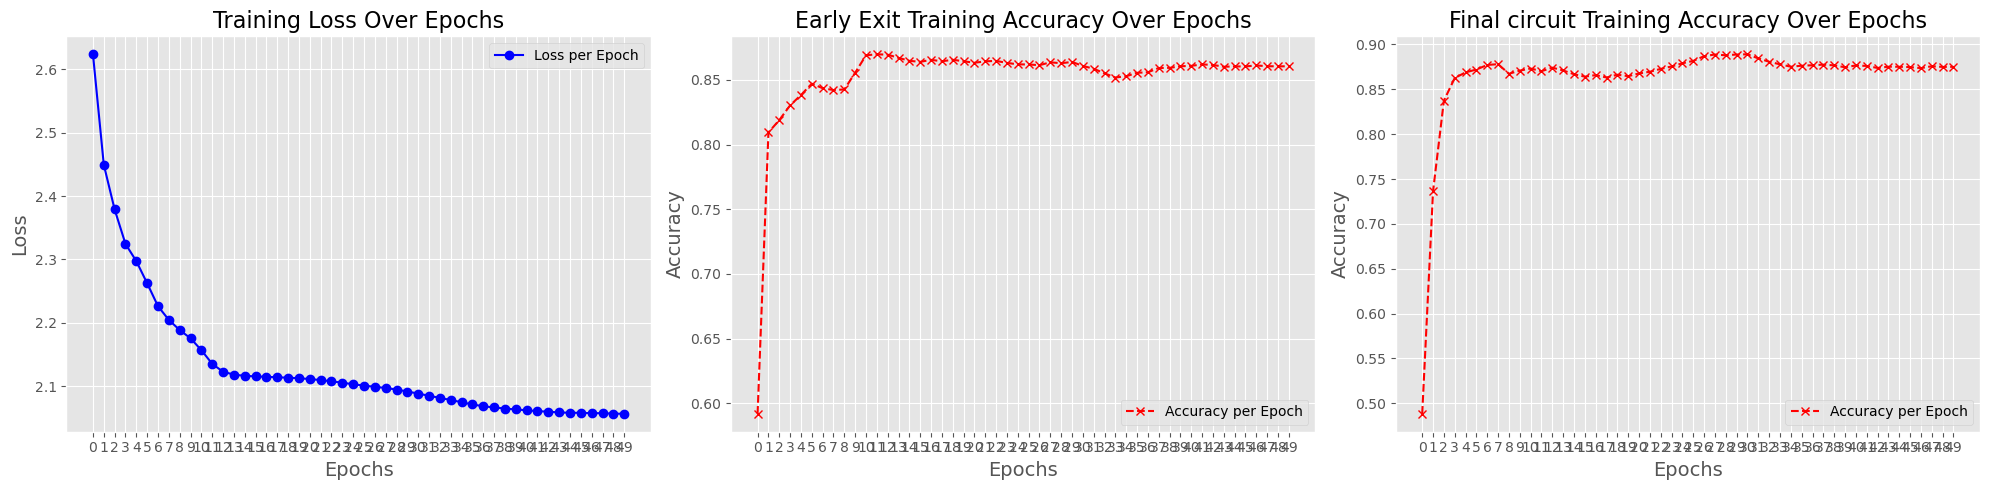

In [147]:
mcm_accuracy, fm_accuracy, loss_history = mcm_model.fit(dataloader=train_dataloader, learning_rate=0.001, epochs=50, show_plot=True)

In [150]:
import pickle
model_params = mcm_model.params
with open("/Users/jackvittori/Desktop/analisi-rumore/no-rumore/pesi-history-50epochs-norumore.pickle", "wb") as file:
    pickle.dump(model_params, file)
    pickle.dump(mcm_accuracy, file)
    pickle.dump(fm_accuracy, file)
    pickle.dump(loss_history,file)

In [115]:
def early_evaluation_utils(params: Dict, state: torch.Tensor = None): 
    first_pair = [0,1]
    measurements = []
    if state is not None:
        # state vector initialization with input
        qml.QubitStateVector(state, wires=range(8))
    for i in range(4):
        for j in range(8):
            qml.RX(params[f'layer_{i}'][j, 0], wires=j)
            qml.RY(params[f'layer_{i}'][j, 1], wires=j)
            qml.RZ(params[f'layer_{i}'][j, 2], wires=j)
        for j in range(8):
            qml.CNOT(wires=[j, (j + 1) % 8])
    
    for w in first_pair: 
        measurements.append(qml.measure(wires=w)) #measure first pair of qubits
    return measurements

def fully_evaluation_utils(params: Dict, state: torch.Tensor = None):
    first_pair = [0,1]
    second_pair = [2,3]
    mcasurements = []
    if state is not None:
        # state vector initialization with input
        qml.QubitStateVector(state, wires=range(8))
    for i in range(4):
        for j in range(8):
            qml.RX(params[f'layer_{i}'][j, 0], wires=j)
            qml.RY(params[f'layer_{i}'][j, 1], wires=j)
            qml.RZ(params[f'layer_{i}'][j, 2], wires=j)
        for j in range(8):
            qml.CNOT(wires=[j, (j + 1) % 8])
            
    for w in first_pair: 
        mcasurements.append(qml.measure(wires=w)) #measure first pair of qubits

    for i in range(4, 8):
        for j in range(8):
            qml.RX(params[f'layer_{i}'][j, 0], wires=j)
            qml.RY(params[f'layer_{i}'][j, 1], wires=j)
            qml.RZ(params[f'layer_{i}'][j, 2], wires=j)
        for j in range(8):
            qml.CNOT(wires=[j, (j + 1) % 8])

    for w in second_pair:
        mcasurements.append(qml.measure(wires=w))

    return mcasurements

In [116]:
dev = qml.device("default.qubit", wires=8)
@qml.qnode(dev)  
def early_evaluation_ansatz(params: Dict, state: torch.Tensor = None):
    early_measurement = early_evaluation_utils(params=params, state=state)
    return qml.probs(op=early_measurement)

@qml.qnode(dev)
def fully_evaluation_ansatz(params: Dict, state: torch.Tensor = None):
    measurements = fully_evaluation_utils(params=params, state=state)
    mid_measurement = measurements[:2]
    final_measurement = measurements[2:]
    return qml.probs(op=mid_measurement), qml.probs(op=final_measurement)

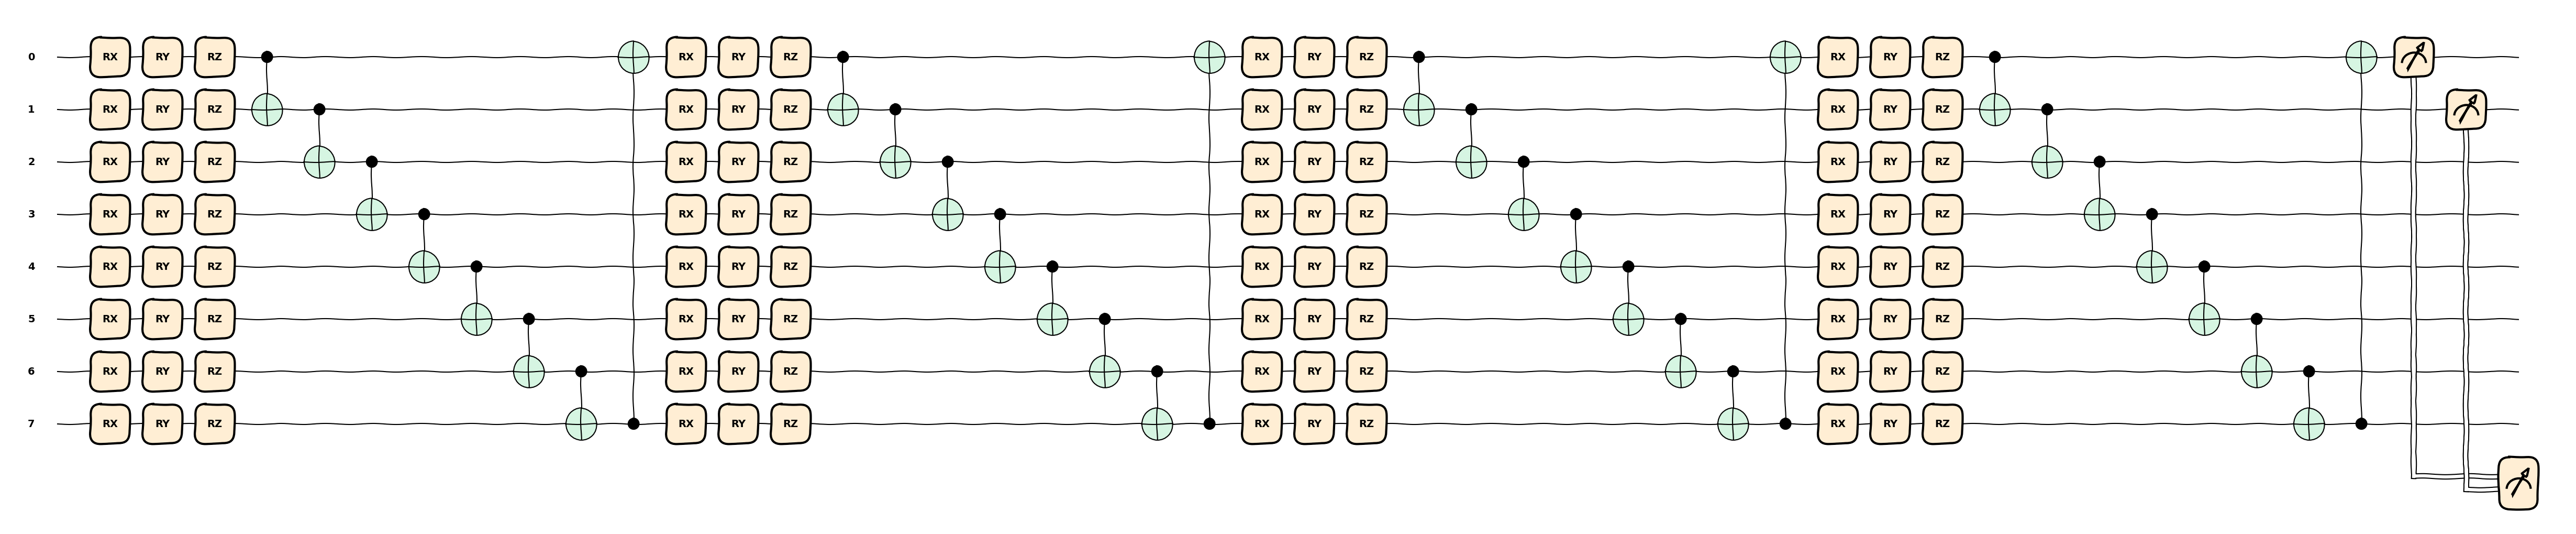

In [118]:
early_evaluate_model, ax1 = qml.draw_mpl(early_evaluation_ansatz)(model_params)

early_evaluate_model.savefig('early_evaluate_model.png')

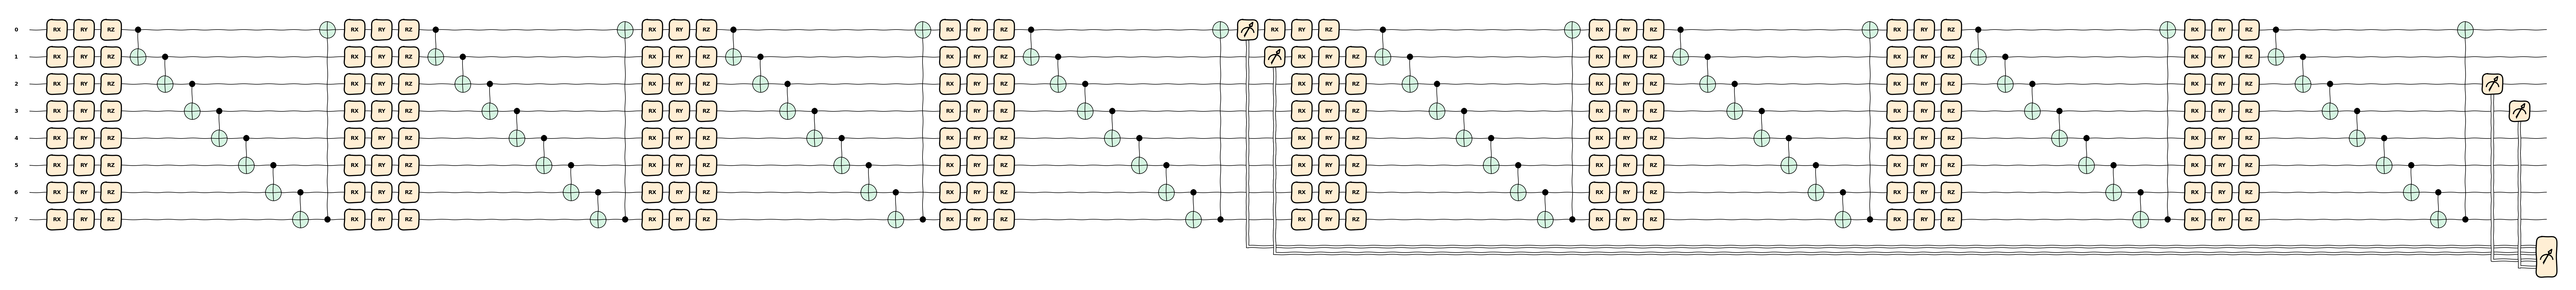

In [119]:
final_evaluate_model, ax2 = qml.draw_mpl(fully_evaluation_ansatz)(model_params)

final_evaluate_model.savefig('final_evaluate_model.png')

In [137]:
def evaluation_routine(dataloader: DataLoader, parameters: Dict, threshold: float):
    
    evaluation_results = []
    early_results = []
    count_1 = 0 #counter for early classified images
    count_2 = 0 #counter for final classified images
    early_correct = 0 #counter for correctly early classified images 
    final_correct = 0 #counter for correctly final classified images
    executed_layers = 0
    for img, target in dataloader.dataset:
        #img normalization
        img = img / torch.linalg.norm(img).view(-1, 1)
        
        #mid circuit evaluation
        early_probs = early_evaluation_ansatz(params=parameters, state=img)
        early_prediction = torch.argmax(early_probs, dim=1)
        confidence = early_probs[0, early_prediction].item()
        early_guess = early_prediction == target
        early_results.append(early_guess.item())
        
        if confidence >= threshold:
            evaluation_results.append(early_guess.item())
            count_1 += 1
            executed_layers += 4
            if early_guess: 
                early_correct += 1
            
        else: 
            final_probs = fully_evaluation_ansatz(params=parameters, state=img)
            early_full, final_full = final_probs
            final_predictions = torch.argmax(final_full, dim=1)
            final_guess = final_predictions == target
            evaluation_results.append(final_guess.item())
            count_2 += 1
            executed_layers += 12
            
            if final_guess: 
                final_correct += 1
    total_accuracy = sum([1 for i in evaluation_results if i == True])/len(evaluation_results)
    early_total_accuracy = sum([1 for i in early_results if i == True])/len(early_results)
    early_exited_accuracy = early_correct/count_1 if count_1 > 0 else 0
    final_exited_accuracy = final_correct/count_2 if count_2 > 0 else 0
    
    return total_accuracy, early_total_accuracy, early_exited_accuracy, count_1, final_exited_accuracy, count_2, executed_layers

In [138]:
def explain_evaluation(dataloader: DataLoader, parameters: Dict, threshold: List[float]):
    summary_data = {
    'Threshold': [],
    'Total Accuracy': [],
    '# early exited images': [],
    'Early exited Accuracy': [],
    'Early total accuracy': [],
    '# final classified images': [],
    'Final classified Accuracy': [],
    "Executed layers": []}
    
    for t in tqdm(threshold):
        total_accuracy, early_total_accuracy, early_exited_accuracy, count_1, final_exited_accuracy, count_2, executed_layers = evaluation_routine(dataloader, parameters, t)
        summary_data['Threshold'].append(t)
        summary_data['Total Accuracy'].append(total_accuracy)
        summary_data['# early exited images'].append(count_1)
        summary_data['Early exited Accuracy'].append(early_exited_accuracy)
        summary_data['Early total accuracy'].append(early_total_accuracy)
        summary_data['# final classified images'].append(count_2)
        summary_data['Final classified Accuracy'].append(final_exited_accuracy)
        summary_data['Executed layers'].append(executed_layers)
        
    df = pd.DataFrame(summary_data)
    return df

In [132]:
threshold = [0.25,0.26, 0.27, 0.28, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36]
explain_evaluation(test_dataloader, model_params, threshold)

100%|██████████| 11/11 [16:59<00:00, 92.68s/it] 


,Threshold,Total Accuracy,# early exited images,Early exited Accuracy,Early total accuracy,# final classified images,Final classified Accuracy,Executed layers
0,0.25,0.626817,3714,0.626817,0.626817,0,0.000000,14856
1,0.26,0.633818,3653,0.633726,0.626817,61,0.639344,15344
2,0.27,0.656704,3302,0.664143,0.626817,412,0.597087,18152
3,0.28,0.681206,2755,0.710708,0.626817,959,0.596455,22528
4,0.30,0.703016,1492,0.826408,0.626817,2222,0.620162,32632
5,0.31,0.705170,1015,0.876847,0.626817,2699,0.640608,36448
6,0.32,0.704093,627,0.933014,0.626817,3087,0.657596,39552
7,0.33,0.702477,368,0.964674,0.626817,3346,0.673640,41624
8,0.34,0.699246,212,0.966981,0.626817,3502,0.683038,42872
9,0.35,0.698708,94,1.000000,0.626817,3620,0.690884,43816


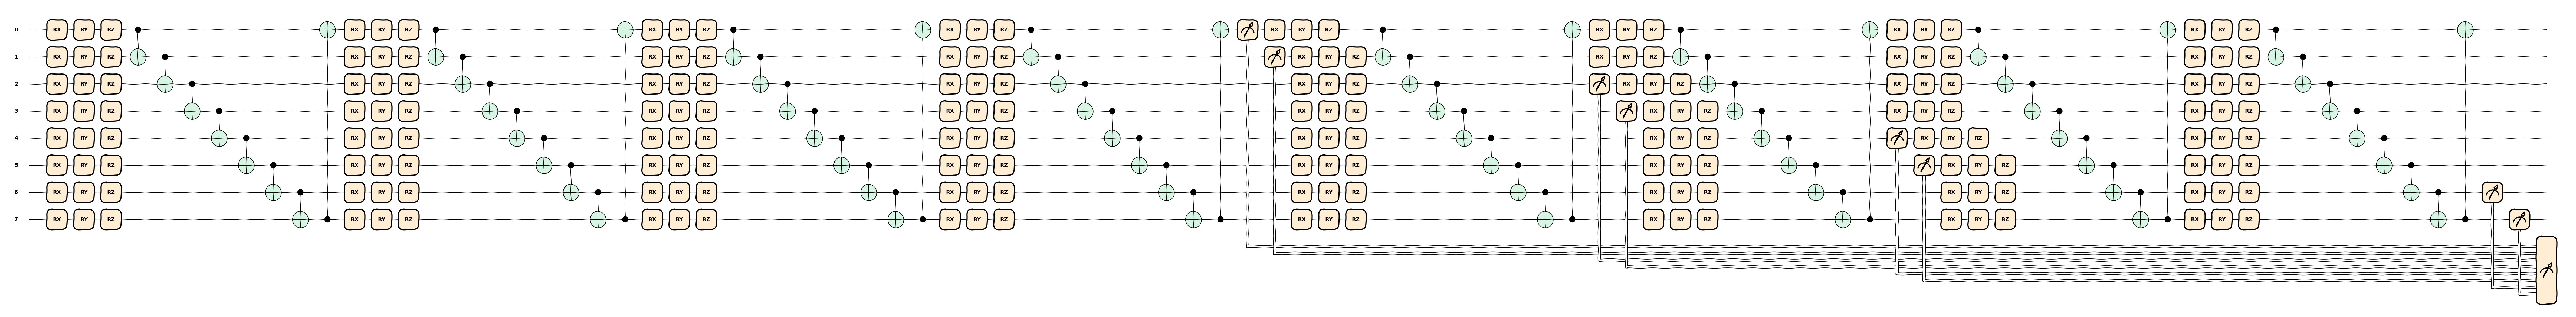

In [131]:
double_exit = MCMQuantumModel(qubits=8, layers=8, early_exits=[3,4,5])
double_exit.draw(style="sketch", path='triple_exit.png')

In [133]:
labels = [0,1,2,3]
# Download MNIST and prepare transforms
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([
                                transforms.Resize((16, 16)),  # Resize to 16x16
                                transforms.ToTensor(),
                                #transforms.Lambda(lambda img: add_salt_and_pepper_noise(img, salt_prob=0.13, pepper_prob=0.13)),
                                transforms.Normalize((0.1307,), (0.3081,))  # Normalize
                             ]))
#train/vali/test 70/15/15 split, see data_utils.py for further details
train_dataloader, validation_dataloader, test_dataloader = mnist_preparation(dataset=mnist, labels = labels, train_test_ratio=0.7,batch_size=64, vali_test_ratio=0.5)

print("Images in the training set: ", len(train_dataloader.dataset), "\n Images in the validation set: ", len(validation_dataloader.dataset), "\n Images in the test set: ", len(test_dataloader.dataset))

Images in the training set:  17327 
 Images in the validation set:  3713 
 Images in the test set:  3714


In [134]:
model = MCMQuantumModel(qubits=8, layers=8, early_exits=[3])

with open("/Users/jackvittori/Desktop/pesimcm4.pickle", "rb") as file:
    params = pickle.load(file) 

model.set_parameters(params)

/opt/homebrew/Caskroom/miniforge/base/envs/qml/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(

In [135]:
model.params['layer_0']

Parameter containing:
tensor([[-0.5570,  0.1994,  0.2567],
        [ 0.3103,  0.8108, -0.4734],
        [ 0.4830,  0.7220,  0.3984],
        [ 0.4336,  0.1728,  0.8487],
        [ 0.0068,  1.3236,  0.3253],
        [ 0.1802, -0.1853,  0.9649],
        [-0.6622,  1.0939,  0.8780],
        [ 1.3517,  0.7396,  0.7481]], requires_grad=True)

In [136]:
params['layer_0']

Parameter containing:
tensor([[-0.5570,  0.1994,  0.2567],
        [ 0.3103,  0.8108, -0.4734],
        [ 0.4830,  0.7220,  0.3984],
        [ 0.4336,  0.1728,  0.8487],
        [ 0.0068,  1.3236,  0.3253],
        [ 0.1802, -0.1853,  0.9649],
        [-0.6622,  1.0939,  0.8780],
        [ 1.3517,  0.7396,  0.7481]], requires_grad=True)

In [140]:
threshold = [0.25, 0.3, 0.35, 0.36, 0.37, 0.4]
explain_evaluation(test_dataloader, params, threshold)

100%|██████████| 6/6 [08:34<00:00, 85.73s/it] 


,Threshold,Total Accuracy,# early exited images,Early exited Accuracy,Early total accuracy,# final classified images,Final classified Accuracy,Executed layers
0,0.25,0.887722,3714,0.887722,0.887722,0,0.000000,14856
1,0.30,0.894453,3484,0.911022,0.887722,230,0.643478,16696
2,0.35,0.926764,2061,0.989811,0.887722,1653,0.848155,28080
3,0.36,0.927571,1740,0.994253,0.887722,1974,0.868794,30648
4,0.37,0.927302,1377,0.994190,0.887722,2337,0.887890,33552
5,0.40,0.927033,525,0.996190,0.887722,3189,0.915648,40368


In [1]:
import pickle

with open("/Users/jackvittori/Desktop/analisi-rumore/no-rumore/pesi-history-50epochs-norumore.pickle", "rb") as file:
    model_params = pickle.load(file)
    mcm_accuracy = pickle.load(file)
    fm_accuracy = pickle.load(file)
    loss_history = pickle.load(file)
    

/opt/homebrew/Caskroom/miniforge/base/envs/qml/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(

In [2]:
model_params

ParameterDict(
    (layer_0): Parameter containing: [torch.FloatTensor of size 8x3]
    (layer_1): Parameter containing: [torch.FloatTensor of size 8x3]
    (layer_2): Parameter containing: [torch.FloatTensor of size 8x3]
    (layer_3): Parameter containing: [torch.FloatTensor of size 8x3]
    (layer_4): Parameter containing: [torch.FloatTensor of size 8x3]
    (layer_5): Parameter containing: [torch.FloatTensor of size 8x3]
    (layer_6): Parameter containing: [torch.FloatTensor of size 8x3]
    (layer_7): Parameter containing: [torch.FloatTensor of size 8x3]
)

In [5]:
mcm_accuracy

[0.5918402777777778,
 0.8093171296296297,
 0.8188657407407407,
 0.8302662037037037,
 0.8382523148148148,
 0.8470486111111111,
 0.8435185185185186,
 0.8421296296296297,
 0.8425347222222223,
 0.8554976851851852,
 0.8689814814814815,
 0.8697337962962963,
 0.8694444444444445,
 0.8670138888888889,
 0.8646990740740741,
 0.8638888888888889,
 0.8654513888888888,
 0.8643518518518518,
 0.8655092592592593,
 0.8643518518518518,
 0.8631944444444445,
 0.8642939814814815,
 0.8646412037037037,
 0.8630787037037037,
 0.8619791666666666,
 0.8618634259259259,
 0.8613425925925926,
 0.8635416666666667,
 0.8628472222222222,
 0.8638310185185185,
 0.8607638888888889,
 0.8585648148148148,
 0.8550347222222222,
 0.8517939814814814,
 0.8527777777777777,
 0.8554398148148148,
 0.8558449074074074,
 0.8591435185185186,
 0.8592592592592593,
 0.860474537037037,
 0.8608217592592593,
 0.8619212962962963,
 0.8615162037037037,
 0.8601273148148149,
 0.8603587962962963,
 0.8603587962962963,
 0.8611111111111112,
 0.86053240740